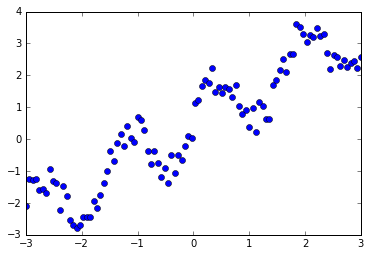

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(-3, 3, 100)

rng = np.random.RandomState(42)
y = np.sin(4*x) + x + rng.uniform(size=len(x))

plt.plot(x, y, 'o')

before :  (100,)
after :  (100, 1)
Weight coefficients:  [ 0.92661741]
y-axis intercept:  0.470180743378
accuracy on training set:  0.826593279361
accuracy on test set:  0.724730560452


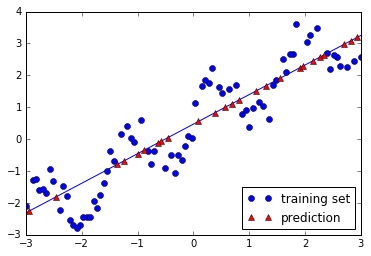

In [32]:
#Linear regression
print('before : ', x.shape)
X = x[:, np.newaxis]
print('after : ', X.shape)

#IMPORTANT : Split the data into training set and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1234)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)

min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o', color='blue', label = 'training set')
#plt.plot(X_test, y_test, '^', color='green')

y_pred = regressor.predict(X_test)

plt.plot(X_test, y_pred, '^', color='red', label = 'prediction')
plt.legend(loc='lower right')

print('accuracy on training set: ', regressor.score(X_train, y_train))
print('accuracy on test set: ', regressor.score(X_test, y_test))



accuracy on training set:  1.0
accuracy on test set:  0.929045201691


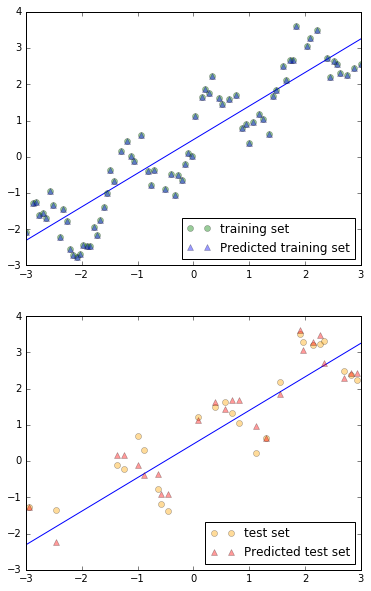

In [58]:
#KNeighbors regression

from sklearn.neighbors import KNeighborsRegressor

kr = KNeighborsRegressor(n_neighbors=1)
kr.fit(X_train, y_train)

plt.figure(figsize=(6,10))
plt.subplot(2,1,1)
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_train, y_train, 'o', color='green', alpha=0.4, label = 'training set')
y_pred = kr.predict(X_train)
plt.plot(X_train, y_pred, '^', color='blue', alpha=0.4, label = 'Predicted training set')
plt.legend(loc='lower right')

plt.subplot(2,1,2)
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X_test, y_test, 'o', color='orange', alpha=0.4, label = 'test set')
y_pred = kr.predict(X_test)
plt.plot(X_test, y_pred, '^', color='red', alpha=0.4, label = 'Predicted test set')
plt.legend(loc='lower right')




print('accuracy on training set: ', kr.score(X_train, y_train))
print('accuracy on test set: ', kr.score(X_test, y_test))

description:  Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio 

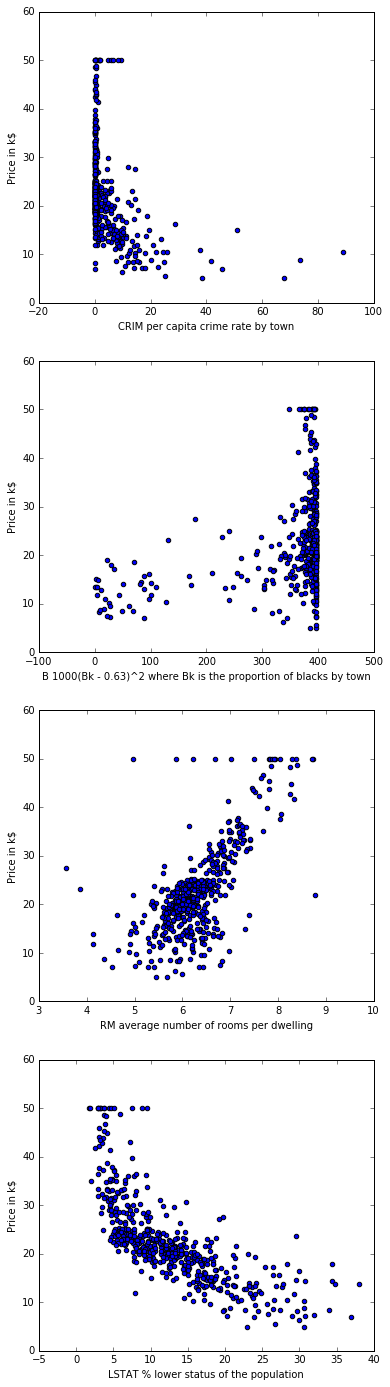

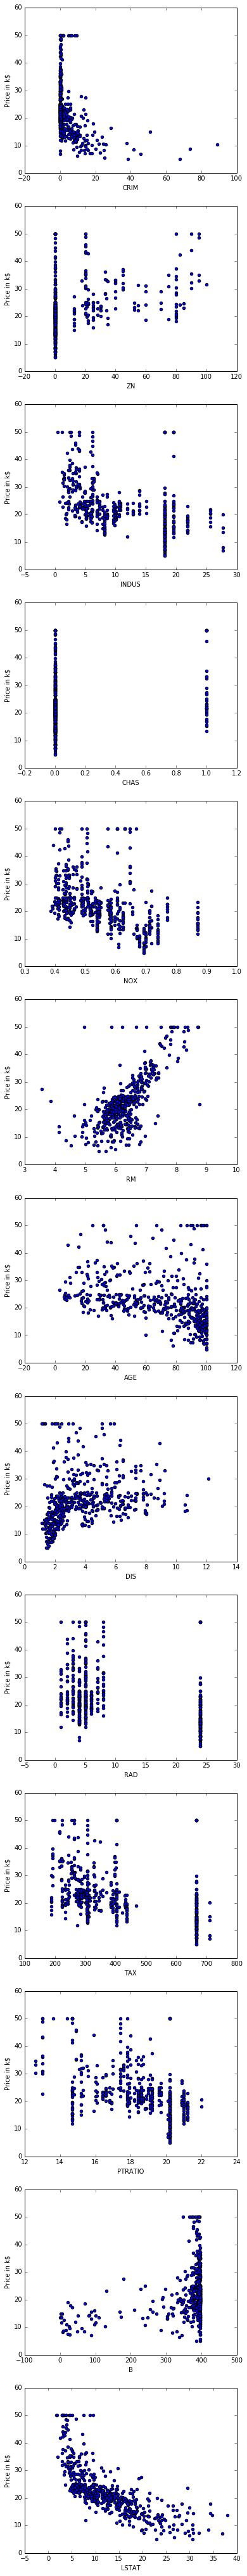

In [94]:
# Exercise on BOSTON dataset (House price)
from sklearn.datasets import load_boston

boston = load_boston()

print('description: ', boston.DESCR)

print('datasize : ', boston.data.shape)
X = boston.data
print('target: ', boston.target.shape)
y = boston.target

plt.figure(figsize=(6,24))

plt.subplot(4,1,1)
plt.scatter(X[:,0], y)
plt.xlabel(boston.feature_names[0] + ' per capita crime rate by town')
plt.ylabel('Price in k$')

plt.subplot(4,1,2)
plt.scatter(X[:,11], y)
plt.xlabel(boston.feature_names[11] + ' 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town')
plt.ylabel('Price in k$')

plt.subplot(4,1,3)
plt.scatter(X[:,5], y)
plt.xlabel(boston.feature_names[5] + ' average number of rooms per dwelling')
plt.ylabel('Price in k$')

plt.subplot(4,1,4)
plt.scatter(X[:,12], y)
plt.xlabel(boston.feature_names[12] + ' % lower status of the population')
plt.ylabel('Price in k$')


print('**** others... *****')

plt.figure(figsize=(6,72))
for i in range(13):
    plt.subplot(13, 1, i+1)
    plt.scatter(X[:,i], y)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel('Price in k$')

    